# Lecture 4: Machine Learning for Speech Processing

## Introduction

- We cannot compute the probabilities, we can only estimate it.
- Learning in Machine Learning is changing/adapting the model to be better, with respect to a certain given criterion.
- The challenge lies in generalizing to new or unobserved situations.
- Learning needs training data, huge amounts of training data, and we have access to only a finite amount of training data.

- Variabilities in speech data: 
    + Language level: isolated words, sentences, spoken languages, read speech, literature languages, spontaneous speech, dialects
    + Speaker level: gender, adult vs child, dialect, age, accent, impaired vs unimpaired, emotion, mood, stress, etc..
    + Noise: 
        - Convolutive: recording/transmission condition, reverberation
        - Additive: recording environment, transmission
        - Lombard effect: speaker level variability in noisy environment (screaming or so ...)

- Depending ont the task, some variabilities are desirable or of interest while others are undesirable or of no interest. The model being trained needs certain features to have variability depending on the function, while others need to stay the same so that they do not affect training and learning.
- We need a quantification method for different features, different variabilities.
- We want to avoid any approximations in the data, so that after quantization and sampling, we can easily go back to the analog space. So we want to keep all variabilities after quantization and sampling, we do not want to lose any data. We need to find a good "encoder" to not lose any data while digitalizing the data, we need to find a good "space" to represent the data (Representation Learning).

## Types of Learning

+ **Supervised Learning:** We need the data to be labelled. We have the "class" of the data.

+ **Reinforcement Learning:** We only have a "partial" label. We only know whether the machine took the right decision or not.

+ **Unsupervised Learning:** The data we have is not labelled. But often there is a hidden goal associated with the task. The goal here is to gather or class the data into clusters.

+ **Self-Supervised Learning:** We use unsupervised learning to create labels for supervised learning.

## Statistical Pattern Recognition:

+ **Classificiation:**
    - **Static Classification:** where we do not care about the sequence. (eg. Male or Female?)
    - **Sequence Classification:** We do care about the sequence.

+ **Detection:** it can be regarded as just a two-class classification problem. But still, we always have a class-imbalance problem, where one class will be overly represented in the training label than the other(s). (eg. Speech vs Non-Speech)

+ **Regression:** relate the input with an output variable, measured variable and explanatory variable. (eg. Speech vs sentiments rate).

### Classification Problems

We have a set of classes: {$C_1, C_2, C_3, ..., C_K$}, and a set of input features (data) {$x_1, x_2, x_3, ..., x_M$}. To estimate the class to which the data point $x_i$ belongs to, et estimate $\arg\max_{k} P(C_{k}| x)$. All probabilities are $\in [0, 1]$, and all probabilities add up to 1, $\sum_{k=1}^{K} P(B_{k}) = 1$ (all classes are collectively exhaustive, meaning I do not have more than K classes), and if they are mutually exclusive, then $P(A) = \sum_{k=1}^{K} P(A, B_{k})$.

- Bayes' rule: $$P(A, B) = P(A | B)\cdot P(B) = P(B | A)\cdot P(A)$$ 

- Gibbs sampler: $$P(B1, ..., B_{k}, ... B_{K}) = \prod_{k=1}^{K} P(B_{k} | B_{k-1}, ..., B_{1})$$

- Posterior Probability $P(C_{k} | x) = \frac{P(x | C_{k})\cdot P(C_{k})}{P(x)}$, with $P(x | C_{k})$ being the likelihood (for which we need to estimate/model the data distribution), and $P(C_{k})$ being the prior probability.

- Deciding the distribution best fitting the data we have, we want to have a decorrelated space, with few parameters to estimate, Gaussians are widely used, KNNs too. Parametric & Non-Parametric ways to model the data.

### Speech Data Modelling

- Sometimes distributions are distinctive enough to be able to easily model the data using Gaussian distributions, but practically not in speech.
- For classification, we would need to know the number of different classes to be modelled, and then add one class to model silence/non-speech.
- This cannot be used directly for speech recognition, we would need to look at sounds in context, sounds do not appear independantly. Context-dependant phones, for this we would need the number of classes raised to the power 3 if we take the previous and next phones, which is practically good for speech recognition, but for speech synthesis we would need a bit more context to be added.


#### GMMs

Gaussian Mixture Models can model data distributions that are more complex than can be represented by just one Gaussian function with a unique covariance matrix.
- For this we would need to know how many Gaussians we need in our model, and then for each Gaussian, we would need the mean vector, the covariance matrix and the weight associated with the Gaussian. These are the estimated parameters for each Gaussian. The GMM is estimated for each class.
- Know the number of Gaussians to represent a certain class. We take the data, perform K-Means clustering, then we will get a distance value, and we will get an idea on the number of GMMs to include for the data. In practice, we fix the same number of GMMs for all classes, to be able to easily compute the likelihood, or else we would need a correction factor.
- There is an equivalence between KMeans & GMMs.
- $$P(X) = \prod_{m=1}^{M} P(x_{m})$$ taking the log: $$log(P(X)) = \sum_{m_1}^{M} log(P(x_{m}))$$ then we take the derivative with respect to $\mu$ to get the mean equation, and then we take the derivative with respect to $\sigma$ and we get the variance equation. This cannot be applied to GMMs, why we use Expectation-Maximization algorthm.

##### EM algorithm:

- E-step, we initialize parameters randomly (assuming we have the right number of Gaussians to fit), and then we compute the probability for all the datapoints to belong to each Gaussian.
- M-step, we then update the parameters to fir better the datapoints.

- We repeat the same process until we are satisfied with the performance of each Gaussian in the GMM for the class.

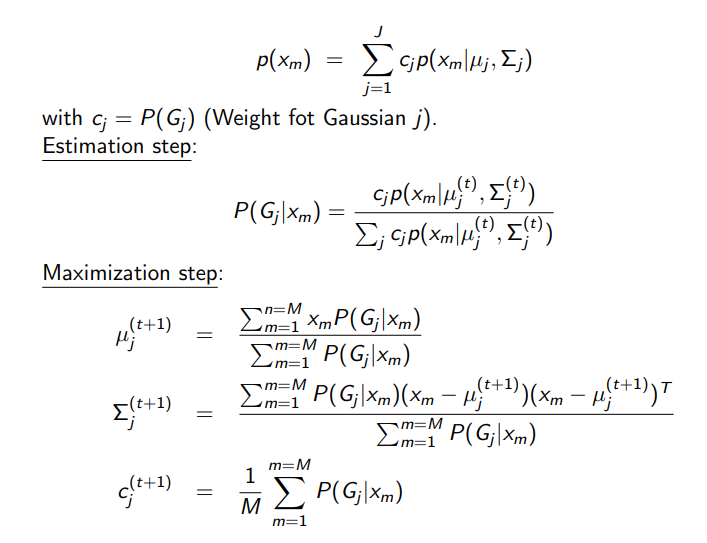


+ Long before using GMMs, we had discrete distributions.

### Discrete Distributions

- Take all the training data, all classes.
- Perform K-Mean
- Take all data points belonging to class $C_{k}$
- Find the cluster IDs
- Then we get a histogram of the cluster IDs
- We therefore turn each feature vector (data point) into a scalar value, where comes the name vector quantization
- This histogram is our discrete distribution


So basically, we take the nearest cluster to each data point in each class. This way we get a discrete distribution for each class $C_{k}$.

## ANN for Classification

- Neural Networks, after having been trained, when trained as a classifier, give an output of the estimate of the Bayes' posterior probability, without going through any other computation.

### Training

- Say we have $`N_{training}`$ training data points, the probability of the class $C_{k}$ will be $\frac{N_{C_{k}}}{N_{training}}$. For each of the data points, we have one feature vector 
{$`X_{1}, X_{2}, ..., X_{training}`$}. The output of the neural network will be a vector of probabilities $P(C_{k} | x_{j})\space \forall k$ for a given input data point x_{j}. Now to compute the probability of a certain class $C_{k}$, we use this formula: $\frac{\sum_{j=1}^{N_{training}}P(C_{k} | x_{j})}{N_{training}}$.

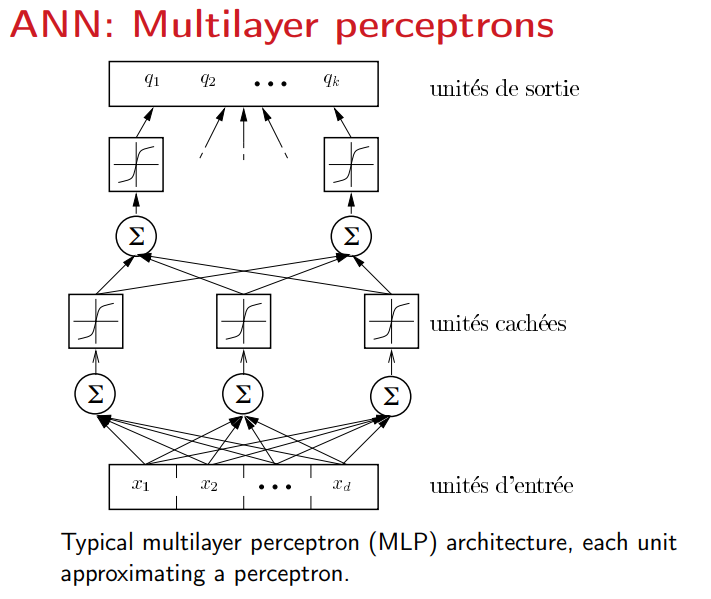

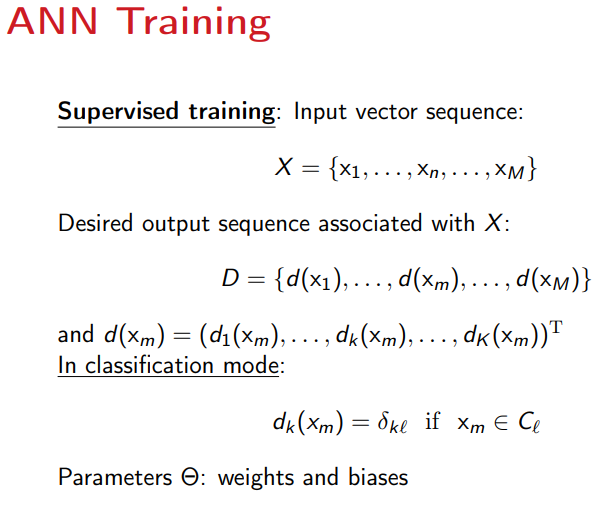

Here we have the target under the format of 1-hot-encoding, a vector of zeroes and a unique one corresponding to the desired class.

We now need an error function to optimize. MSE is the most common error function, but still it is not the best one to use in classification, because we want to compare and minimze the distance between both probability distributions. 
- *KL-divergence:* $KL({b_{k}}, {a_{k}}) = \sum_{k=1}^{K} b_{k}\cdot log(\frac{b_{k}}{a_{k}})$ where $b_{k}$ is the target output and $a_{k}$ is the actual output. $KL({b_{k}}, {a_{k}}) = \sum_{k=1}^{K} b_{k}\cdot log(b_{k}) - \sum_{k=1}^{K} b_{k}\cdot log(a_{k})$.

$\sum_{k=1}^{K} b_{k}\cdot log(b_{k})$ is the entropy of the distribution, which is 0 since we are sure that this is the truth, the ground label, this also does not depend on the neural network parameters at all. $\sum_{k=1}^{K} b_{k}\cdot log(a_{k})$ will be the cross entropy, which will be 0 for all classes except the ground truth class that we want to be activated/predicted.

Use the chain rule to minimze the error function (optimize) and learn (change) the parameters, starting from the last layer and going back to the input layer.

- Offline Error Back-Propagation is where we get all data points, compute the error and then adjust the weights after the training has been done,
- Online Error Back-Propagation is where we get one data point, compute the error and adjust the weights, and then do the same thing with all data points.
- Today we combine both, we use mini batches.


#### Cross-Validation Training

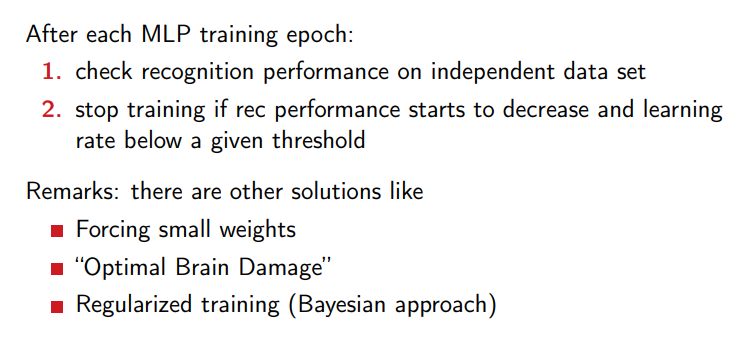

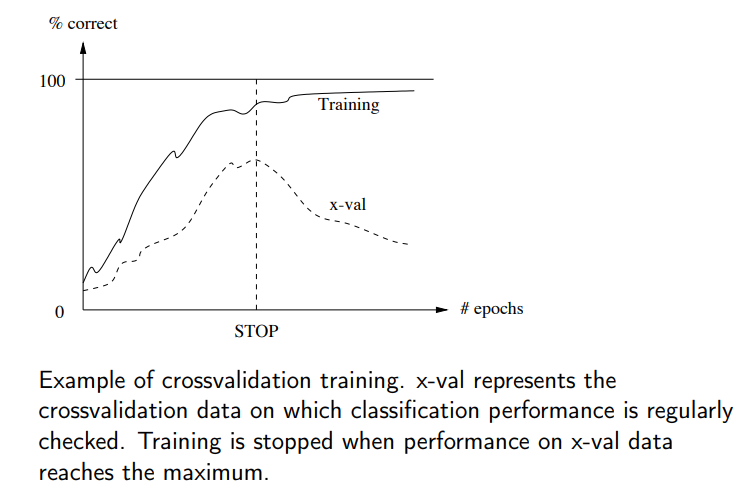


### Interpretation of ANN output $g_{k}(x_{m}, \theta)$

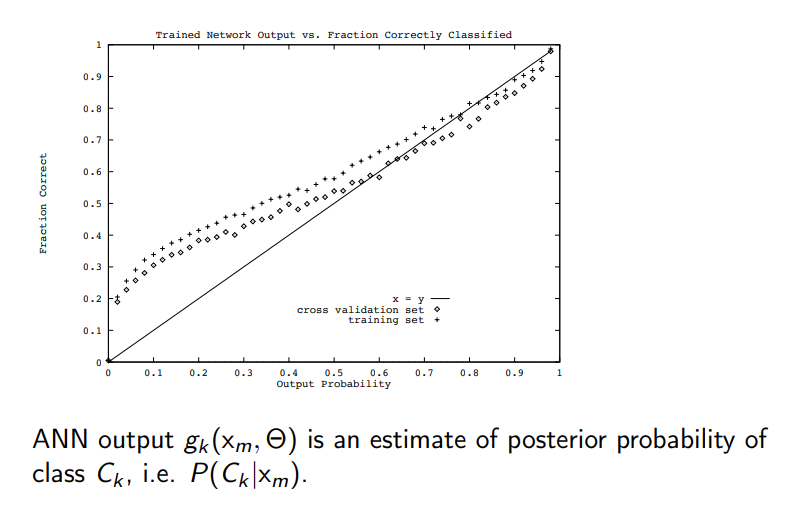

ANN outputs are becoming more and more accurate.

### Decision Making

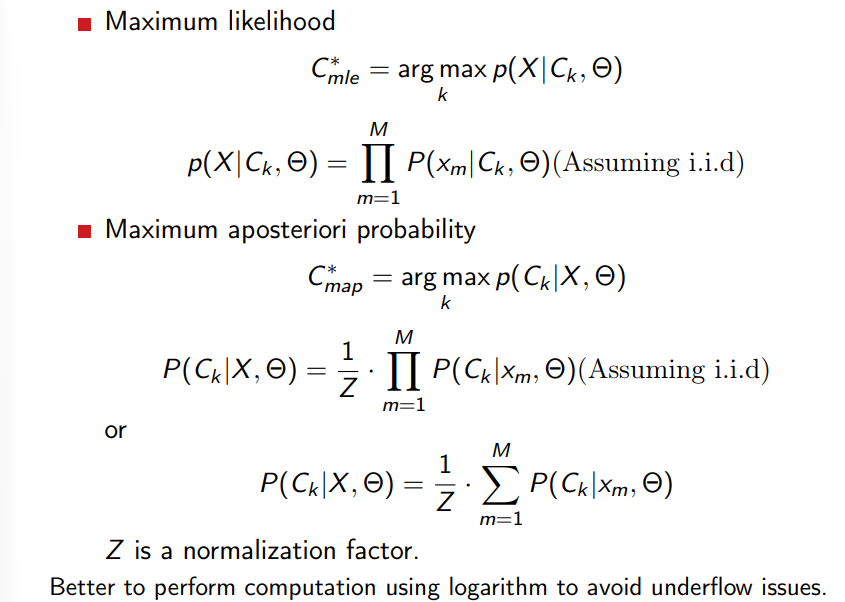


### Advantage of ANN

- We have a problem called curse of dimensionality, it is the fact that for Speech Recognition, we have a dimension of ~39, and for synthesis we have a dimension of ~120, that is for EACH window if we use GMMs. At the same time, temporal context is important, so this dimensionality is multiplied by 3 or 4 or even more to have more context to process.
- For ANN, we can give a few frames at once to the network as input. I do not need to know the distribution, neither will we need to perform some approximations on the dataset. Another thing, is the fact that when we optimize the error function, when we maximize the probability of the true class, automatically it minimizes the probabilities of all the other classes. 
- More variabilities $\rightarrow$ more Gaussians. For ANN, we are just trying to maximize the probability of the right class, so automatically, we are building the ability to ignore the undesirable variability and focus on the important desired variability.